### Introduction to Neural Network Classification in Tensorflow

**Resources/links**
* https://madewithml.com/
  
* https://cs231n.github.io/neural-networks-case-study/

* https://ml-cheatsheet.readthedocs.io/en/latest/

In [1]:
# DL needs
import tensorflow as tf
import tensorflow.keras as kr

# Data needs
import pandas as pd
from sklearn.model_selection import train_test_split

# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

2025-03-02 20:12:20.614365: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


* Classification is where you try to classify something as one thing or another.
* A few types of classification
  * Binary Classification
  * Multiclass Classification
  * Multi-label Classification

**Creating data to view and fit**

In [2]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples=1000

# create circles
X,y=make_circles(n_samples=n_samples,
                 noise=0.03,
                 random_state=random_seed
                 )

X,y[:10] # X--> (x,y) location in 2D space, y gives labels of data

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

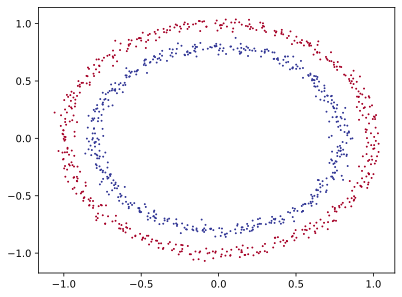

In [33]:
# visualizing the data
circles = pd.DataFrame({'X0': X[:,0],
                         'X1':X[:,1],
                         'label':y})
circles

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu,s=1)
plt.show()

In [4]:
# what should be feature and label shape for neural network
print(X.shape,y.shape)

# no of samples we are working with
print(len(X),len(y))

# printing first example of features and labels
X[0],y[0]

(1000, 2) (1000,)
1000 1000


(array([0.75424625, 0.23148074]), 1)

**Creating train - test split**

In [5]:
# train-test-split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=random_seed)

# convert into tensors, and reshape correctly
X_train,X_test=tf.constant(X_train,dtype=tf.float32),tf.constant(X_test,dtype=tf.float32)

# creating training and testing datasets
train_dataset=tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_dataset=tf.data.Dataset.from_tensor_slices((X_test,y_test))

# creating train and test loader
batch_size=16
train_loader=train_dataset.shuffle(buffer_size=1000).batch(batch_size=batch_size).prefetch(tf.data.AUTOTUNE)
test_loader=test_dataset.shuffle(len(test_dataset)).prefetch(tf.data.AUTOTUNE)


**1) Steps in modelling classification model with tensorflow:**

* Create a model
* Compile the model
* Fit the model (Training)
* Evaluate the model 
* Tweak and Re-evaluate 

In [22]:
# creating a model

class ClassNet(kr.Model):
    def __init__(self,lr=0.01,model_name="model_1",metrics=['accuracy']):
        super().__init__(name=model_name)
        # instantiating constructor of parent class

        # input layer:
        self.input_layer=tf.keras.Input(shape=[2,],name='input_layer')

        # hidden layer:
        self.fc1 = kr.layers.Dense(4,activation=None,name='hl1')
        self.fc2 = kr.layers.Dense(4,activation=None,name='hl2')

        # output layer
        self.output_layer=kr.layers.Dense(1,activation=None,name='output_layer')


        # other hyper-params
        # self.loss_function=kr.losses.BinaryCrossentropy
        self.loss_function="binary_crossentropy"
        self.optimizer=kr.optimizers.Adam(learning_rate=lr)
        self.eval_metrics=metrics

    def call(self,inputs):
        # forward propogation
        x=tf.nn.tanh(self.fc1(inputs))
        x=tf.nn.tanh(self.fc2(x))
        output=tf.nn.sigmoid(self.output_layer(x))
        return output

In [23]:
model_1 = ClassNet(model_name='model_1',lr=0.01)
model_1(tf.keras.Input(shape=[2,]))  
model_1.compile(loss=model_1.loss_function,optimizer=model_1.optimizer,metrics=model_1.eval_metrics)
model_1.summary()
history_1=model_1.fit(train_loader,epochs=25)


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hl1 (Dense)                     │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5186 - loss: 0.7187 
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4727 - loss: 0.6950
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5083 - loss: 0.6925
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5443 - loss: 0.6897
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5512 - loss: 0.6869
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5631 - loss: 0.6852
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5658 - loss: 0.6852
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5394 - loss: 0.6822
Epoch 9/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6289 - loss: 0.6667
Epoch 10/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5874 - loss: 0.6720
Epoch 11/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5965 - loss: 0.6675
Epoch 12/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6820 - l

In [25]:
# test accuracy
model_1.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9954 - loss: 0.1614 


[0.16727517545223236, 0.9900000095367432]

In [26]:
margin=0.1 # margin for meshgrid
num_points=100 # points in meshgrid
x_min,x_max=tf.reduce_min(X[:,0]) - margin, tf.reduce_max(X[:,0]) + margin
y_min,y_max=tf.reduce_min(X[:,1]) - margin, tf.reduce_max(X[:,1]) + margin

# creating meshgrid
xx,yy = np.meshgrid(np.linspace(x_min,x_max,num_points),
                    np.linspace(y_min,y_max,num_points))

yy.shape

(100, 100)

In [31]:
# visualizing model's predictions, lets create a function 
def plot_decision_boundary(X,y,model):
    '''
    Input: Trained model, Features(X), and labels(y)
    # Creates a meshgrid of different X values
    # make predictions across the meshgrid
    # plot predictions as well as line between different zones where each unique class falls
    '''
    margin=0.1 # margin for meshgrid
    num_points=100 # points in meshgrid
    x_min,x_max=tf.reduce_min(X[:,0]) - margin, tf.reduce_max(X[:,0]) + margin
    y_min,y_max=tf.reduce_min(X[:,1]) - margin, tf.reduce_max(X[:,1]) + margin

    # creating meshgrid
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,num_points),
                        np.linspace(y_min,y_max,num_points))

    # creating X (input) value to make predictions
    x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together [(x1,y1),(x2,y2)....]
    
    # making predictions
    y_pred = model.predict(x_in)

    # check for multi-class classification
    if len(y_pred[0]) > 1:
        print("Multi-class classification")
        # we need to reshape our predictions to get them ready for plot
        y_pred=tf.argmax(y_pred,axis=1).numpy().reshape(xx.shape)
    else:
        print("Binary classification")
        y_pred=tf.round(y_pred).numpy().reshape(xx.shape)

    # plotting the decision boundary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=1,cmap=plt.cm.RdYlBu)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
Binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
Binary classification


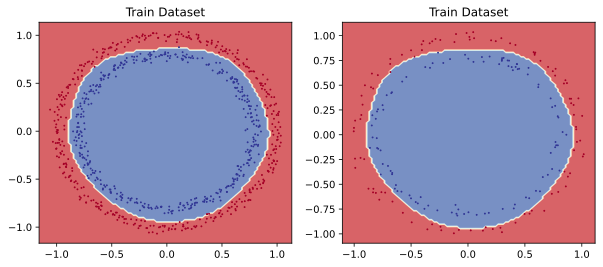

In [32]:
# plot the decision boundary for train and test datasets

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Train Dataset")
plot_decision_boundary(X_train,y_train,model_1)
plt.subplot(1,2,2)
plt.title("Train Dataset")
plot_decision_boundary(X_test,y_test,model_1)


**2. Using history of `model.fit()`**

In [35]:
history_1.history

{'accuracy': [0.5087500214576721,
  0.5037500262260437,
  0.5037500262260437,
  0.5412499904632568,
  0.5412499904632568,
  0.5687500238418579,
  0.5537499785423279,
  0.5737500190734863,
  0.6012499928474426,
  0.6150000095367432,
  0.6412500143051147,
  0.6887500286102295,
  0.6937500238418579,
  0.8349999785423279,
  0.8774999976158142,
  0.8762500286102295,
  0.8912500143051147,
  0.9049999713897705,
  0.9700000286102295,
  0.9587500095367432,
  0.9887499809265137,
  0.9850000143051147,
  0.9937499761581421,
  0.987500011920929,
  0.9925000071525574],
 'loss': [0.7018908858299255,
  0.6939811706542969,
  0.6929157972335815,
  0.6895801424980164,
  0.6868201494216919,
  0.6840711236000061,
  0.6836110949516296,
  0.6758958697319031,
  0.6705245971679688,
  0.6665564775466919,
  0.6570271253585815,
  0.6416750550270081,
  0.6240472197532654,
  0.5906248688697815,
  0.5556679964065552,
  0.5165603160858154,
  0.46332111954689026,
  0.4172917306423187,
  0.3559458553791046,
  0.3100103

In [37]:
# converting history object to dataframe
hist_1=pd.DataFrame(history_1.history)
hist_1

,accuracy,loss
0,0.50875,0.701891
1,0.50375,0.693981
2,0.50375,0.692916
3,0.54125,0.689580
4,0.54125,0.686820
5,0.56875,0.684071
6,0.55375,0.683611
7,0.57375,0.675896
8,0.60125,0.670525
9,0.61500,0.666556


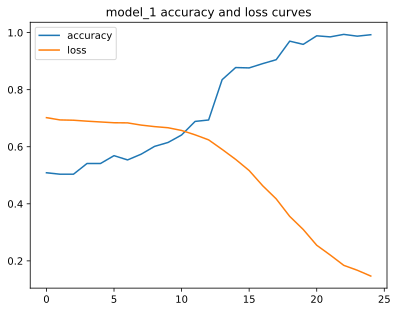

In [38]:
# plotting the loss curves 
hist_1.plot()
plt.title('model_1 accuracy and loss curves');

**Note:**
* We want the loss function value to decrease and accuracy value to increase